In [2]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

import keras
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Activation
from keras.applications import xception

In [3]:
import pathlib

path= "D:/preprocessed dataset 2/Train"
path = pathlib.Path(path)

In [4]:
batch_size= 16
train_ds=tf.keras.preprocessing.image_dataset_from_directory(path,
                                                             validation_split=0.2,
                                                             labels='inferred',
                                                             subset="training",
                                                             seed=123,
                                                             image_size=(256,256),
                                                             label_mode='categorical',
                                                             batch_size=batch_size,
                                                            shuffle=True)

Found 3240 files belonging to 4 classes.
Using 2592 files for training.


In [5]:
batch_size= 16
val_ds=tf.keras.preprocessing.image_dataset_from_directory(path,
                                                             validation_split=0.2,
                                                             labels='inferred',
                                                             subset="validation",
                                                             seed=123,
                                                             image_size=(256,256),
                                                             label_mode='categorical',
                                                             batch_size=batch_size,
                                                            shuffle=True)

Found 3240 files belonging to 4 classes.
Using 648 files for validation.


In [6]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "D:/preprocessed dataset 2/Test",
    labels='inferred',
    batch_size=16,
    image_size=(256, 256),
    shuffle = False)

Found 1200 files belonging to 4 classes.


In [7]:
class_names= train_ds.class_names
print(class_names)

['Falciparum', 'Malarie', 'Ovale', 'Vivax']


In [8]:
xception_model= Sequential()
pretrained_model= keras.applications.Xception(
    include_top= False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='avg',
    classes=4,
    classifier_activation="softmax",
)
xception_model.add(pretrained_model)
xception_model.add(Flatten())
xception_model.add(Dense(512, activation='relu'))
xception_model.add(Dense(4, activation='softmax'))

In [9]:
xception_model.compile(loss= "categorical_crossentropy",
             optimizer="Adam",
             metrics=["accuracy"])

In [10]:
history = xception_model.fit(train_ds,
         validation_data=val_ds,
         epochs=10,
         batch_size=16,shuffle= True)

Epoch 1/10


162/162 [==============================] - 949s 6s/step - loss: 0.5471 - accuracy: 0.8137 - val_loss: 6.6902 - val_accuracy: 0.5694
Epoch 2/10
162/162 [==============================] - 5066s 31s/step - loss: 0.2585 - accuracy: 0.9198 - val_loss: 0.2037 - val_accuracy: 0.9429
Epoch 3/10
162/162 [==============================] - 952s 6s/step - loss: 0.2314 - accuracy: 0.9240 - val_loss: 0.2636 - val_accuracy: 0.8873
Epoch 4/10
162/162 [==============================] - 12578s 78s/step - loss: 0.1120 - accuracy: 0.9591 - val_loss: 0.6592 - val_accuracy: 0.8688
Epoch 5/10
162/162 [==============================] - 2737s 17s/step - loss: 0.1206 - accuracy: 0.9603 - val_loss: 0.2057 - val_accuracy: 0.9028
Epoch 6/10
162/162 [==============================] - 2752s 17s/step - loss: 0.1300 - accuracy: 0.9660 - val_loss: 1.6074 - val_accuracy: 0.7377
Epoch 7/10
162/162 [==============================] - 1071s 7s/step - loss: 0.1263 - accuracy: 0.9591 - val_loss: 0.0838 - val_accu

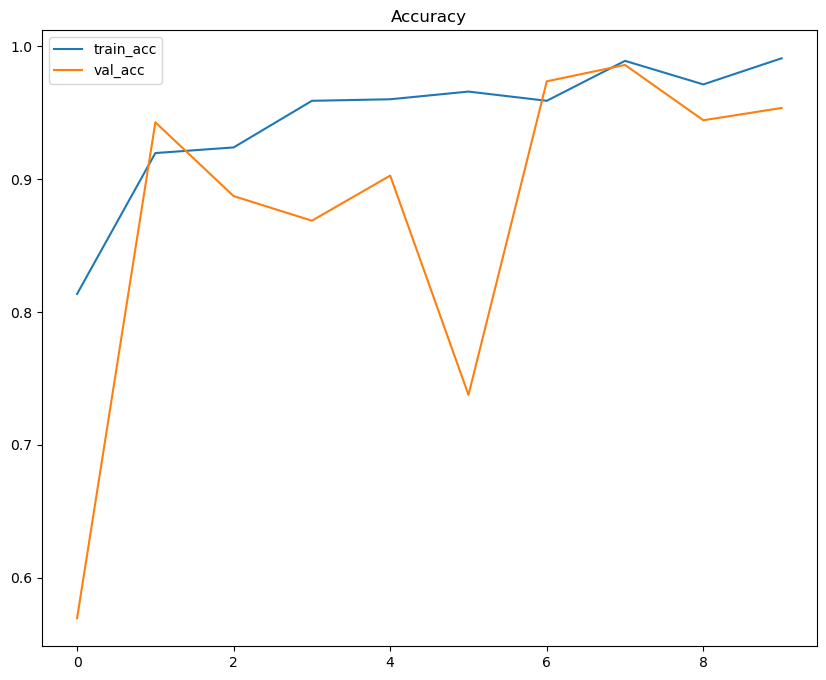

In [11]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

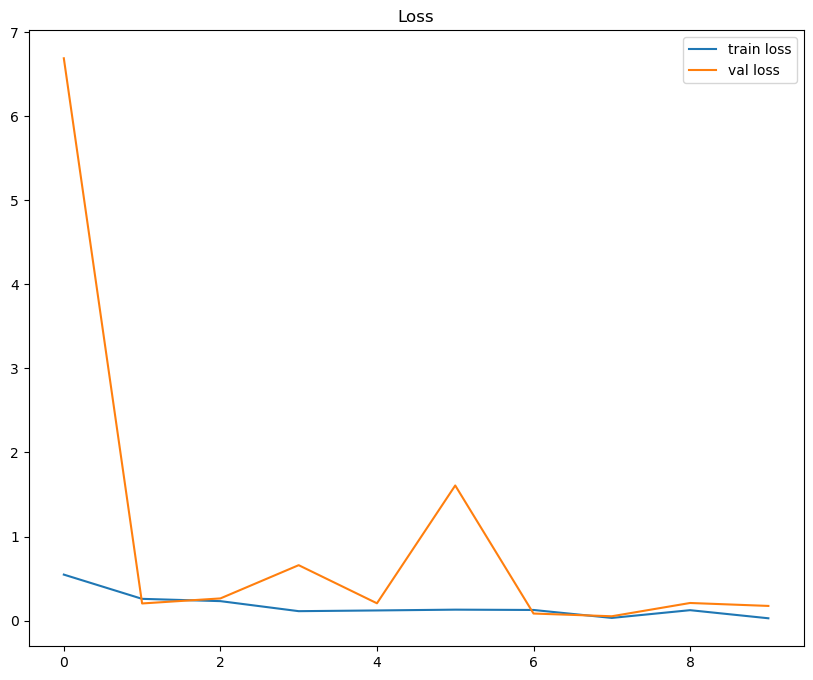

In [12]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [14]:
predictions = xception_model.predict(test_dataset)

75/75 [==============================] - 117s 2s/step


In [15]:
import numpy as np
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in test_dataset],axis=0)

[Text(0, 0.5, 'Falciparum'),
 Text(0, 1.5, 'Malarie'),
 Text(0, 2.5, 'Ovale'),
 Text(0, 3.5, 'Vivax')]

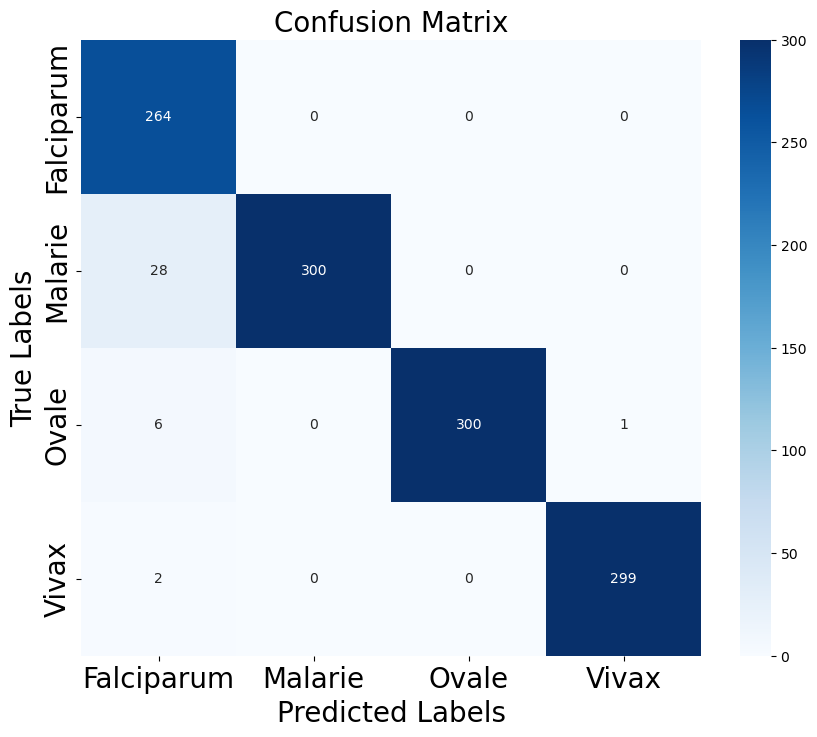

In [16]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(predicted_labels,true_labels)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap= "Blues",ax=ax)
ax.set_xlabel('Predicted Labels',fontsize=20);ax.set_ylabel('True Labels', fontsize=20)
ax.set_title('Confusion Matrix',fontsize=20);
ax.xaxis.set_ticklabels(['Falciparum', 'Malarie', 'Ovale','Vivax'], fontsize=20); ax.yaxis.set_ticklabels(['Falciparum', 'Malarie', 'Ovale','Vivax'], fontsize=20)

In [17]:
from sklearn.metrics import f1_score
f1_score(true_labels, predicted_labels, average='micro')

0.9691666666666666

In [18]:
from sklearn.metrics import recall_score
recall_score(true_labels, predicted_labels, average='weighted')

0.9691666666666666

In [19]:
from sklearn.metrics import precision_score
precision_score(true_labels, predicted_labels, average='micro')

0.9691666666666666